## 1) Import all the crucial libraries

In [904]:
import numpy as np
import pandas as pd #read csv file

from matplotlib import pyplot as plt #for plotting the graph
import seaborn as sns #use for data visualization

#use for build model
import tensorflow as tf
from tensorflow import keras
from imblearn.under_sampling import RandomUnderSampler #for balancing data
from sklearn.preprocessing import LabelEncoder #for one-hot encoding
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #for splitting the data

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 

print(tf.__version__)

2.4.1


## 2) Import dataset and explore the data<br>
In this section, we explore the data and we also use graph for visualize the data for make us easier to understand about the data

In [905]:
maternal_health_data = pd.read_csv('Maternal-Health-Risk-Data-Set.csv')

In [906]:
maternal_health_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


## 2.1) Plot graph for RiskLevel attribute

This is to know roughly about the value that have inside the class label.

/home/ubuntu/anaconda3/envs/ISP560/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


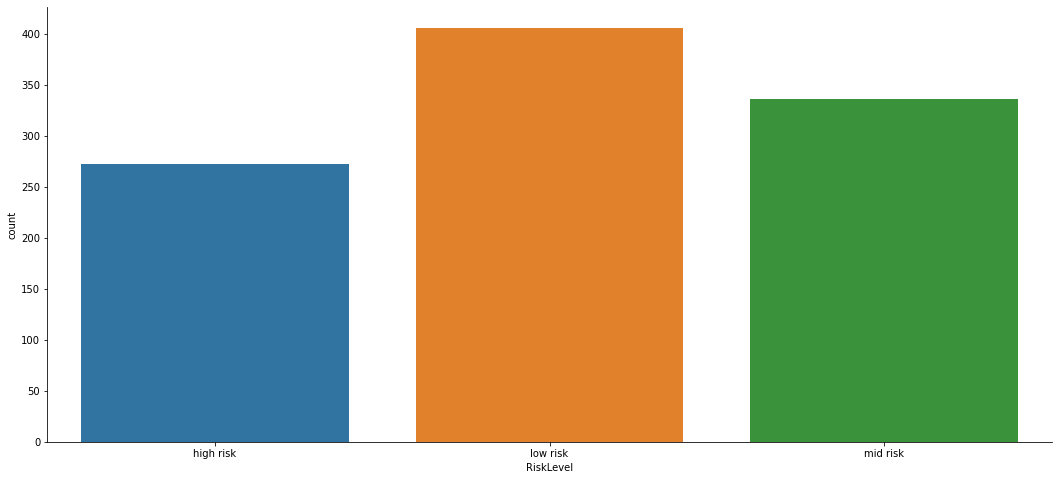

In [907]:
sns.countplot(maternal_health_data['RiskLevel'], label="Count")
plt.show()

## 2.2) Assign data to feature label and class label <br>

Moreover, we divide the input variable and output variable for make more easier for us to build model.

In [908]:
# assign all attribute except RiskLevel(class label/target) to variable X
# assign class label to a variable y

X = maternal_health_data.drop('RiskLevel', axis=1) # 1-row, 0-col, drop attribute RiskLevel
y = maternal_health_data['RiskLevel']

In [909]:
print(y)

0       high risk
1       high risk
2       high risk
3       high risk
4        low risk
          ...    
1009    high risk
1010    high risk
1011    high risk
1012    high risk
1013     mid risk
Name: RiskLevel, Length: 1014, dtype: object


In [910]:
# get class distribution for each value of class label

y.value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

<AxesSubplot:ylabel='RiskLevel'>

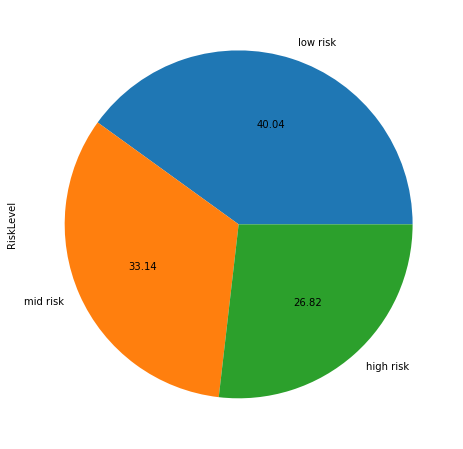

In [911]:
# show pie plot

y.value_counts().plot.pie(autopct='%.2f')

## 3) Balancing the data

## 3.1) Random undersampling

1. Purpose: To resample data which to balance the data accordingly. 
2. Method: Under sampling which means majority class will follow the minority class label.

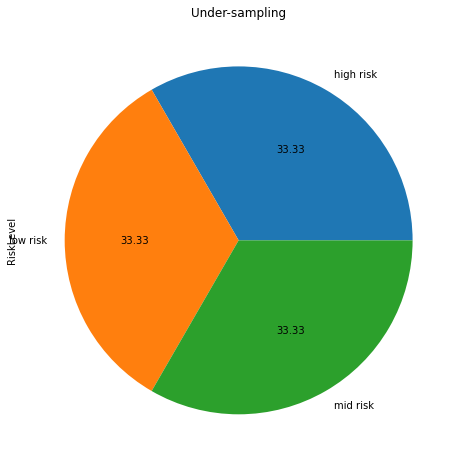

In [912]:
# keys - class label, values - desired values for each class label
#sampling_strategy = {0: 272, 1: 272, 2: 272}

sampling_strategy = "not minority"
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [913]:
# New class distribution after resample
y_res.value_counts()

high risk    272
low risk     272
mid risk     272
Name: RiskLevel, dtype: int64

In [914]:
print(y_res)

0      high risk
1      high risk
2      high risk
3      high risk
4      high risk
         ...    
811     mid risk
812     mid risk
813     mid risk
814     mid risk
815     mid risk
Name: RiskLevel, Length: 816, dtype: object


## 4) Encode output variable

## 4.1) Encoding the categorical data

we make this process by using one-hot encoding.<br>
<b>1. [1 0 0] - Class high risk<b><br>
<b>2. [0 1 0] - Class low risk<b><br>
<b>3. [0 0 1] - Class mid risk<b>

In [915]:
# convert newly created y_res into  matrix with boolean for each class value
# [1 0 0] - Class high risk, [0 1 0] - Class low risk, [0 0 1] - Class mid risk
# 0 - High Risk
# 1 - Low Risk
# 2 - Mid Risk

# change string to integer
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_res)

# change integer to matrix with boolean form
y_res2 = tf.keras.utils.to_categorical(y_encoded)

In [916]:
print(y_res2)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


## 5) Splitting the dataset

In [917]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res2, test_size=0.2, random_state=42
)

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (652, 6)
X_test.shape: (164, 6)
y_train.shape: (652, 3)
y_test.shape: (164, 3)


In [918]:
print(y_test)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1.

## 6) Build the model

In [919]:
# build model follow https://www.youtube.com/watch?v=2Iy9-aep2X4
#set seed
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# compile model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(lr = 0.03),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name = 'accuracy')]
)

## 6.1) Train the model

In [920]:
history = model.fit(X_train, y_train, batch_size=128, epochs=150, validation_data=(X_test,y_test), verbose = 1)

Epoch 1/150
6/6 [==============================] - 1s 90ms/step - loss: 3.5212 - accuracy: 0.5308 - val_loss: 1.6995 - val_accuracy: 0.5772
Epoch 2/150
6/6 [==============================] - 0s 29ms/step - loss: 1.4930 - accuracy: 0.5719 - val_loss: 1.1700 - val_accuracy: 0.6585
Epoch 3/150
6/6 [==============================] - 0s 21ms/step - loss: 1.2066 - accuracy: 0.6395 - val_loss: 1.0911 - val_accuracy: 0.6667
Epoch 4/150
6/6 [==============================] - 0s 33ms/step - loss: 1.1015 - accuracy: 0.6679 - val_loss: 1.1407 - val_accuracy: 0.6626
Epoch 5/150
6/6 [==============================] - 0s 22ms/step - loss: 1.1171 - accuracy: 0.6643 - val_loss: 1.0978 - val_accuracy: 0.6667
Epoch 6/150
6/6 [==============================] - 0s 34ms/step - loss: 1.1196 - accuracy: 0.6667 - val_loss: 1.0896 - val_accuracy: 0.6667
Epoch 7/150
6/6 [==============================] - 0s 20ms/step - loss: 1.1077 - accuracy: 0.6667 - val_loss: 1.0849 - val_accuracy: 0.6667
Epoch 8/150
6/6 [===

In [921]:
model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_150 (Dense)            (None, 4)                 28        
_________________________________________________________________
dense_151 (Dense)            (None, 3)                 15        
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [922]:
#list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## 6.2) Plotting the result of model

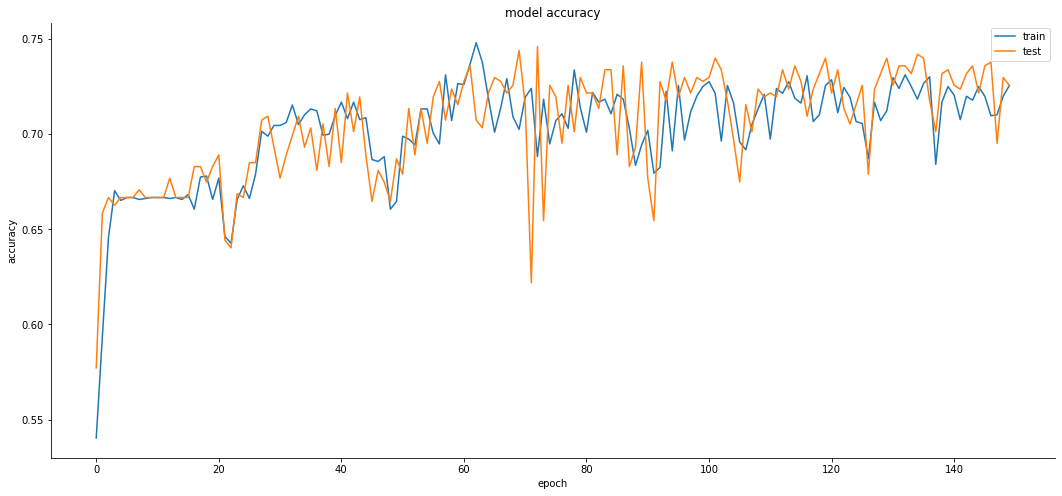

In [923]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

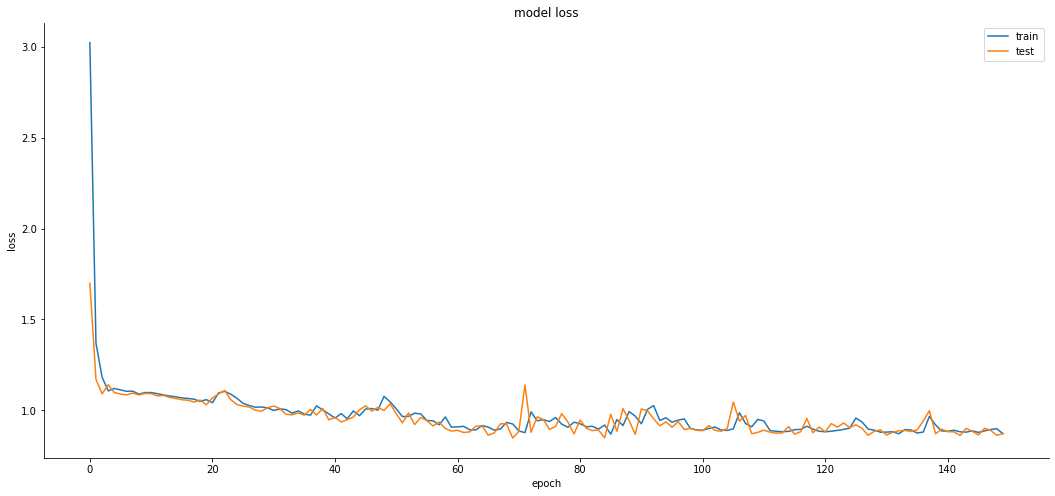

In [924]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [925]:
#to evaluate loss and accuracy
accuracy_test = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.8718 - accuracy: 0.7256


## 6.3) Model predict

In [926]:
predictions = model.predict(X_test)

In [927]:
predictions

array([[0.84237313, 0.04319789, 0.11442891],
       [0.13434981, 0.39976814, 0.465882  ],
       [0.11778173, 0.41491243, 0.4673059 ],
       [0.84237313, 0.04319789, 0.11442891],
       [0.14469466, 0.3908341 , 0.4644713 ],
       [0.10344382, 0.42903596, 0.46752018],
       [0.11309254, 0.41941583, 0.4674917 ],
       [0.08502973, 0.4490079 , 0.46596244],
       [0.10016648, 0.43242365, 0.46740988],
       [0.23332556, 0.32504663, 0.44162786],
       [0.7224256 , 0.08579691, 0.19177754],
       [0.08865704, 0.44487885, 0.46646407],
       [0.04588067, 0.5034699 , 0.45064944],
       [0.06818338, 0.4698076 , 0.46200898],
       [0.84237313, 0.04319789, 0.11442891],
       [0.15322126, 0.38372752, 0.4630512 ],
       [0.07135025, 0.46566382, 0.46298593],
       [0.14717425, 0.3887448 , 0.464081  ],
       [0.03955408, 0.51508534, 0.4453606 ],
       [0.32827353, 0.2671195 , 0.40460694],
       [0.7224256 , 0.08579691, 0.19177754],
       [0.84237313, 0.04319789, 0.11442891],
       [0.

In [928]:
predictions[40]

array([0.48600507, 0.18593276, 0.32806215], dtype=float32)

In [929]:
y_test[40]

array([1., 0., 0.], dtype=float32)

In [930]:
#np.argmax - to returns the indices of the max element in the array 
np.argmax(predictions[40])

0

# Notes: 

1) [1 0 0] - Class high risk<br><br> 
2) [0 1 0] - Class low risk<br><br>
3) [0 0 1] - Class mid risk

In [931]:
#to verify the predictions according to the labels
def verify_predictions(i, predictions_array, y_test):
    predicted_labels = np.argmax(predictions_array)
    true_labels = y_test[i]
    
    #change one-hot encoding to integer
    inverted_labels = np.argmax(true_labels)
    
    if predicted_labels == inverted_labels:
        if predicted_labels == 0:
            print("High Risk")
        elif predicted_labels == 1:
            print("Mid Risk")
        elif predicted_labels == 2:
            print("Low Risk")
    else:
        print("Wrong predictions!")


In [932]:
i = 40
verify_predictions(i, predictions[i], y_test)

High Risk
